In [1]:

import ipywidgets as widgets
from IPython.core.display import Markdown, display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


C:\Users\hp\AppData\Local\Temp\ipykernel_112912\2088148750.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Markdown, display


(0.0, 3.0)

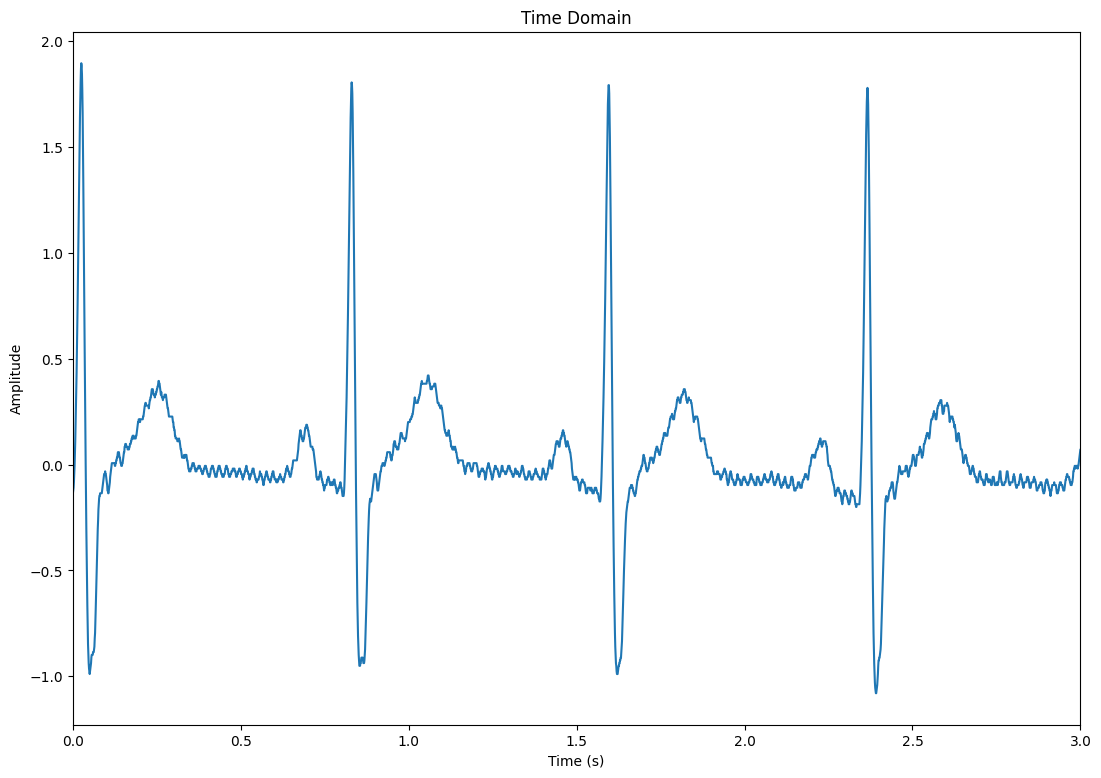

In [3]:
df=pd.read_csv('Data1.txt',sep='\s+',header=None)
df=pd.DataFrame(df)
t = df[df.columns[0]]
x = df[df.columns[1]] - 1.3
fs = 1/0.001
N = len(df.index)
ohm=np.zeros(int(fs))
H=np.zeros(int(fs))
for i in range(int(-fs//2),int(fs//2)):
    ohm[i] =2*np.pi*i/fs


n = np.arange(0,N,1,dtype=int)
plt.figure(figsize=((13,9)))
plt.plot(n/fs,x[n])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Domain")
plt.xlim(0,3)


In [4]:
def Filter (P,Window,M,fl,fh,fc):
        ohmfl = 2*np.pi*fl/fs
        ohmfh = 2*np.pi*fh/fs
        ohmfc = 2*np.pi*fc/fs
        w=np.zeros(2*M+1)
        h=np.zeros(2*M+1)
        hw=np.zeros(2*M+1)
        y0=np.zeros(N+2*M)
        y=np.zeros(N+2*M)
        for i in range(0,2*M+1):
                x[-i]=x[0]
        for i in range (N,N+2*M+1):
                x[i] = x[N-1]
        for a in range(-M,M):
                if P=='LPF':
                        for a in range(-M,M):
                                h[a]=(np.sin(ohmfc*a))/(a*np.pi)        
                        h[0]=ohmfc/np.pi
                        h[M]=h[-M]
                if P == 'HPF':
                        for a in range(-M,M):
                                h[a]=-1*((np.sin(ohmfc*a))/(a*np.pi))    
                        h[0]=(np.pi-ohmfc)/np.pi
                        h[M]=h[-M]
                if P == 'BSF':
                        for a in range(-M,M):
                                h[a]=(-(np.sin(ohmfh*a)/a*np.pi))+(np.sin(ohmfl*a)/a*np.pi)    
                        h[0]=(np.pi- ohmfh + ohmfl)/np.pi
                        h[M]=h[-M]
                if P == 'BPF':
                        for a in range (-M,M):
                                h[a]=(np.sin(ohmfh*a)/(a*np.pi))-(np.sin(ohmfl*a)/(a*np.pi))
                        h[0]=(ohmfh-ohmfl)/np.pi
                        h[M]=h[-M]
        for i in range(-M,M):
                if Window == 'Rectangular':
                        w[i] =  1
                if Window == 'Bartlett (triangular)':
                        w[i] =  1 - abs(i)/M
                if Window == 'Hanning':
                        w[i] =  0.5 + 0.5*np.cos(i*np.pi/M)
                if Window == 'Hamming':
                        w[i] =  0.54 + 0.46*np.cos(i*np.pi/M)
                if Window == 'Blackman':
                        w[i] =  0.42 + 0.5*np.cos(i*np.pi/M) + 0.08*np.cos(2*i*np.pi/M)
                #filter koef 

        for i in range (-M,M):
                hw[i]=h[i]*w[i] 

        for n in range(0,N):
                for i in range(0, (2*M + 1)):
                        y0[n] += hw[i-M]*x[n-i]
                

        for n in range(N-1,-1,-1):
                for i in range(2*M , -1, -1):
                        y[n]+=hw[i-M]*y0[n+i]
             
                        
        n=np.arange(-M,M+1)
        g=np.arange(0,N,1,dtype=int)
        fig, axs = plt.subplots(4, figsize=(13,20))
        axs[0].plot(g/fs,x[g],'orange')
        axs[0].set_title('Sinyal Input',fontweight="bold", size=14)
        axs[1].stem(n,h[n],'aqua')
        axs[1].set_title('Respon Impluse h',fontweight="bold", size=14)
        axs[2].stem(n,hw[n],'crimson')
        axs[2].set_title('Respon Impluse hw',fontweight="bold", size=14)
        axs[3].plot(g/fs,y[g],'violet')
        axs[3].set_title('Sinyal Output',fontweight="bold", size=14)
        for ax in axs.flat:
                ax.set(xlabel='i sample',ylabel='h(i)')
                ax.grid()
        axs[0].set(xlabel='Waktu(s)',ylabel='Amplitudo (mV)')
        axs[3].set(xlabel='Waktu(s)',ylabel='Amplitudo (mV)')
        return y
        
        


In [5]:
# widget
P =widgets.Dropdown(
    options = ['LPF','HPF','BPF','BSF'],
    value ='BSF')
Window = widgets.Dropdown(
    options = ['Rectangular','Bartlett (triangular)','Hanning','Hamming','Blackman'],
    value = 'Blackman')
M = widgets.IntSlider(
    min=2,
    max=100,
    step=1,
    description='Lebar Filter')
fc = widgets.FloatSlider(
    min=0,
    max=200,
    step=0.5,
    description='Fc')    
fl = widgets.FloatSlider(
    min=0,
    max=200,
    step=0.5,
    description='Fc Low')

fh = widgets.FloatSlider(
    min=0,
    max=300,
    step=0.5,
    description='Fc High')
widgets.interact_manual(Filter,P=P,Window=Window,M=M,fl=fl,fh=fh,fc=fc)





interactive(children=(Dropdown(description='P', index=3, options=('LPF', 'HPF', 'BPF', 'BSF'), value='BSF'), D…

<function __main__.Filter(P, Window, M, fl, fh, fc)>

C:\Users\hp\AppData\Local\Temp\ipykernel_112912\1500017558.py:17: RuntimeWarning: invalid value encountered in scalar divide
  h[a]=(np.sin(ohmfc*a))/(a*np.pi)


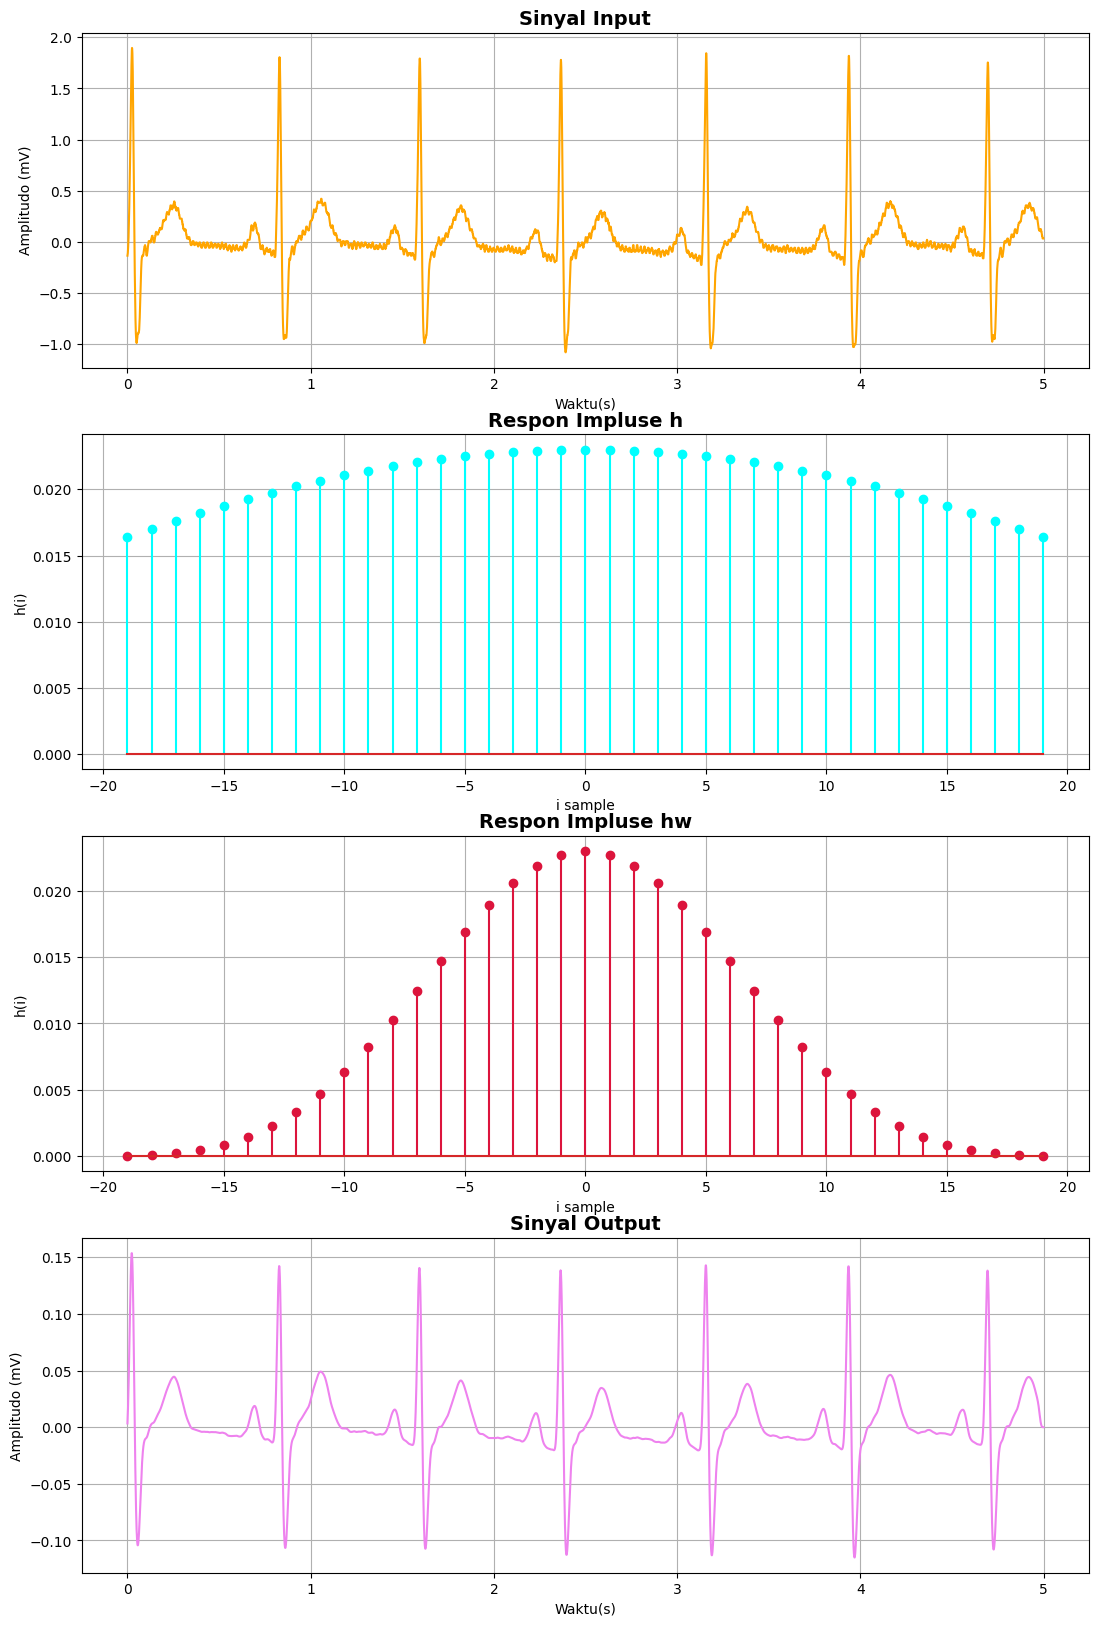

In [6]:
P=P.value
Window=Window.value
M=M.value
fl=fl.value
fh=fh.value
fc=fc.value
y=Filter(P,Window,M,fl,fh,fc)
X_real = np.zeros(N)
X_imaj = np.zeros(N)
MagDFT1 = np.zeros(N) 


In [7]:
s1p = np.zeros(N)
s1q = np.zeros(N)
s1t = np.zeros(N)
A=0
for n in range(N):
    if t[n]*0.001 < 0.65 or t[n]*0.001> 0.75 :
        s1p[n]=0
    else :
        s1p[A]=y[n]
        s1p[n]=0
        A=A+1
A=0
for n in range(N):
    if t[n]*0.001 < 1.55 or t[n]*0.001> 1.65 :
        s1q[n]=0
    else :
        s1q[A]=y[n]
        s1q[n]=0
        A=A+1
A=0
for n in range(N):
    if t[n]*0.001 < 0.95 or t[n]*0.001> 1.2 :
        s1q[n]=0
    else :
        s1t[A]=y[n]
        s1t[n]=0
        A=A+1


In [8]:
X_real1p = np.zeros(N)
X_imaj1p = np.zeros(N)
MagDFT1p = np.zeros(N) 

#DFT
for k in range(N):
    for n in range(N):
        X_real1p[k] += s1p[n]*np.cos(2*np.pi*k*n/N)
        X_imaj1p[k] -= s1p[n]*np.sin(2*np.pi*k*n/N)

for k in range(N):
    MagDFT1p[k] = np.sqrt(np.square(X_real1p[k]) + np.square(X_imaj1p[k])) 

In [9]:
#DFT sinyal QRS
X_real1q = np.zeros(N)
X_imaj1q = np.zeros(N)
MagDFT1q = np.zeros(N) 

#DFT
for k in range(N):
    for n in range(N):
        X_real1q[k] += s1q[n]*np.cos(2*np.pi*k*n/N)
        X_imaj1q[k] -= s1q[n]*np.sin(2*np.pi*k*n/N)

    
for k in range(N):
    MagDFT1q[k] = np.sqrt(np.square(X_real1q[k]) + np.square(X_imaj1q[k])) 

In [10]:
#DFT sinyal t
X_real1t = np.zeros(N)
X_imaj1t = np.zeros(N)
MagDFT1t = np.zeros(N) 

#DFT
for k in range(N):
    for n in range(N):
        X_real1t[k] += s1t[n]*np.cos(2*np.pi*k*n/N)
        X_imaj1t[k] -= s1t[n]*np.sin(2*np.pi*k*n/N)

    
for k in range(N):
    MagDFT1t[k] = np.sqrt(np.square(X_real1t[k]) + np.square(X_imaj1t[k])) 

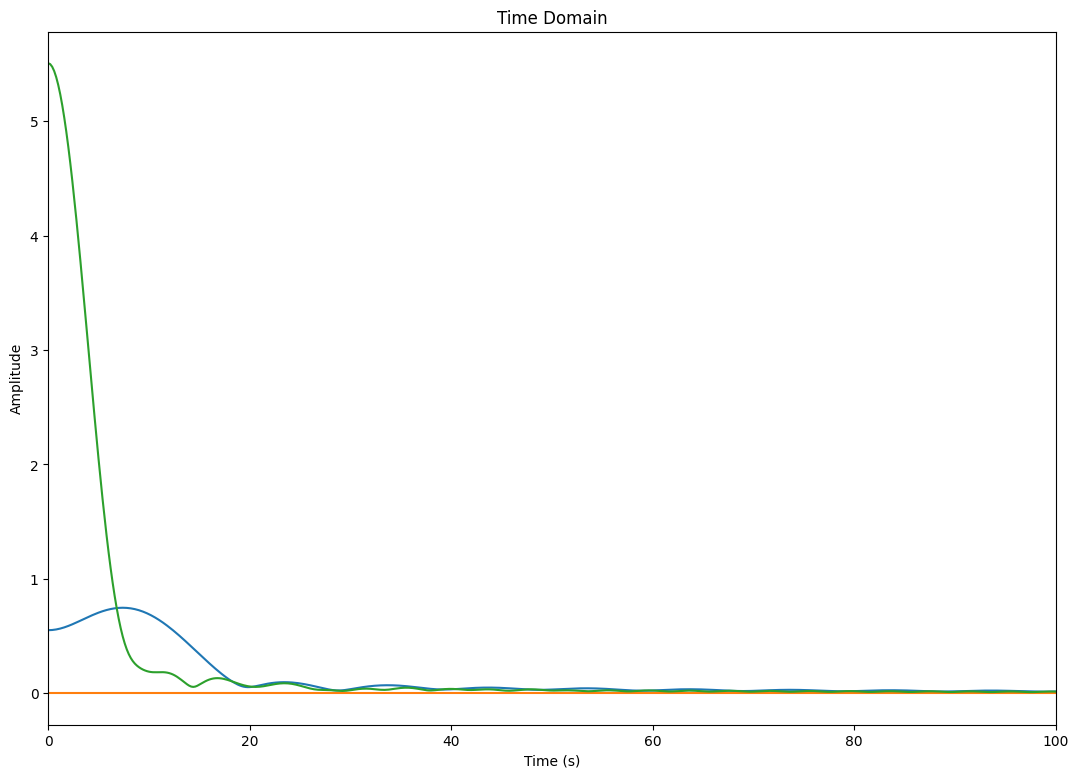

In [11]:
n = np.arange(0,N,1,dtype=int)
k = np.arange(0,N,1,dtype=int)     

plt.figure(figsize=((13,9)))
plt.plot(k*fs/N,MagDFT1p[n],k*fs/N,MagDFT1q[n],k*fs/N,MagDFT1t[n])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Domain")
plt.xlim(0,100)
plt.show()